# Stem cell function and disease progression in muscular dystrophy using injured mouse model

In [47]:
import os
import skimage
import scanpy as sc
import anndata as ad
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

## Load and pre-process the data

In [19]:
project_path = "/Users/Swarnali_1/Stem-cell-function-and-disease-progression-in-muscular-dystrophy-using-injured-mouse-model/data/"

samples = {"not_injured" : "GSM8289594_QSC_GFP_filtered_feature_bc_matrix.h5",
"injured" : "GSM8289595_ASC_GFP_filtered_feature_bc_matrix.h5"}

adatas = {}

for sample_id, file_id in samples.items():
    path = os.path.join(project_path, file_id)
    sample_adata = sc.read_10x_h5(path)
    sample_adata.var_names_make_unique()
    adatas[sample_id] = sample_adata

for sample_id, sample in adatas.items():
    print(f"Sample Name: {sample_id}, Sample: {sample}")

adata = ad.concat(adatas, label = "sample")
adata.obs_names_make_unique()
print(adata.obs["sample"].value_counts())

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1758: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Sample Name: not_injured, Sample: AnnData object with n_obs × n_vars = 8449 × 32285
    var: 'gene_ids', 'feature_types', 'genome'
Sample Name: injured, Sample: AnnData object with n_obs × n_vars = 6429 × 32285
    var: 'gene_ids', 'feature_types', 'genome'
sample
not_injured    8449
injured        6429
Name: count, dtype: int64
AnnData object with n_obs × n_vars = 14878 × 32285
    obs: 'sample'


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


## Quality Control

               mt   ribo     hb  n_cells_by_counts  mean_counts  \
Xkr4        False  False  False                192     0.020567   
Gm1992      False  False  False                  6     0.000470   
Gm19938     False  False  False                 16     0.001210   
Gm37381     False  False  False                  2     0.000134   
Rp1         False  False  False                  9     0.000672   
...           ...    ...    ...                ...          ...   
AC124606.1  False  False  False                  0     0.000000   
AC133095.2  False  False  False                  0     0.000000   
AC133095.1  False  False  False                  0     0.000000   
AC234645.1  False  False  False                  0     0.000000   
AC149090.1  False  False  False               3358     0.286262   

            log1p_mean_counts  pct_dropout_by_counts  total_counts  \
Xkr4                 0.020359              98.709504         306.0   
Gm1992               0.000470              99.959672   

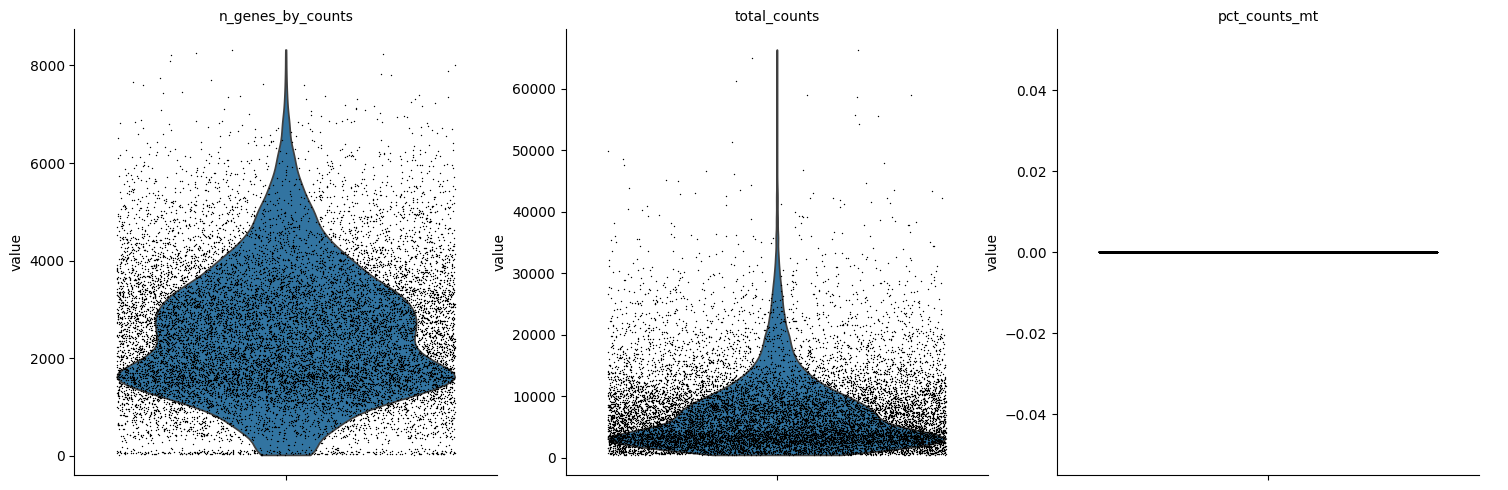

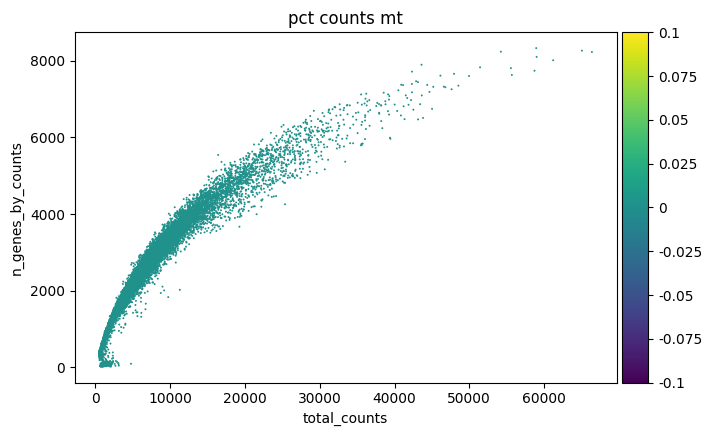

In [37]:

## Mitochondrial content
adata.var["mt"] = adata.var_names.str.startswith("Mt-")
## Ribosomal genes
adata.var["ribo"] = adata.var_names.str.startswith("RPS", "RPL")
## Hemoglobin genes
adata.var["hb"] = adata.var_names.str.startswith("^HB[^(P)]")

# Sanity check
print(adata.var)

## Calculate quality control metrics
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt", "ribo", "hb"], inplace=True, log1p=True
)
## Visualize quality metrics using violin plot
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

## Visualize quality metrics using scatter plot
sc.pl.scatter(
    adata, 
    "total_counts", "n_genes_by_counts", 
    color = "pct_counts_mt"
)

This dataset does not have any mitochondrial, ribosomal or hemoglobin content to filter out; However, it always helps to visualize these quality metrics to ensure the quality looks fine before going ahead.

In [39]:
# Filter out some cells as a basic quality control measure
sc.pp.filter_cells(adata, min_genes = 100)
sc.pp.filter_genes(adata, min_cells = 3)

## Doublet Detection

In [48]:
sc.pp.scrublet(adata, batch_key="sample")

## Data Normalization
It is normal practice to log transform the values such that the gene counts are uniform across the cells. 

In [ ]:
#Save the view into a variable
adata.layers["counts"] = adata.X.copy()
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

In [72]:

print(adata.var_names)

Index(['Xkr4', 'Gm1992', 'Gm19938', 'Rp1', 'Sox17', 'Gm37587', 'Mrpl15',
       'Lypla1', 'Tcea1', 'Rgs20',
       ...
       'mt-Cytb', 'CAAA01118383.1', 'Csprs', 'AC132444.6', 'Vamp7', 'Spry3',
       'Tmlhe', 'CR974586.4', 'CAAA01147332.1', 'AC149090.1'],
      dtype='object', length=22257)
